## Step 1: Uploading the Datasets
In this step, the CSV files are uploaded that contain transaction data, customer data, and city data. These files will be used for the data analysis.


In [1]:
from google.colab import files
uploaded = files.upload()


Saving Transaction_ID.csv to Transaction_ID.csv
Saving Customer_ID.csv to Customer_ID.csv
Saving City.csv to City.csv
Saving Cab_Data.csv to Cab_Data.csv


## Step 2: Loading the Datasets
After uploading the files, we load the data into Pandas DataFrames to facilitate data manipulation and analysis. Below, we load the four datasets: `Cab_Data.csv`, `City.csv`, `Customer_ID.csv`, and `Transaction_ID.csv`, and display the first few rows of each to verify the data.


In [5]:
import pandas as pd

# Load the uploaded files into Pandas DataFrames
cab_data = pd.read_csv('Cab_Data.csv')
city_data = pd.read_csv('City.csv')
customer_data = pd.read_csv('Customer_ID.csv')
transaction_data = pd.read_csv('Transaction_ID.csv')

# Now you can preview the data
print(cab_data.head())
print(city_data.head())
print(customer_data.head())
print(transaction_data.head())


   Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
4        10000015           42372  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776  
             City   Population      Users
0     NEW YORK NY   8,405,837    302,149 
1      CHICAGO IL   1,955,130    164,468 
2  LOS ANGELES CA   1,595,037    144,132 
3        MIAMI FL   1,339,155     17,675 
4  SILICON VALLEY   1,177,609     27,247 
   Customer ID Gender  Age  Income (USD/Month)
0        29290   Male   28               10813
1        27703   

## Step 3: Checking Data Structure and Missing Values
In this step, each data set is checked for missing values, to identify any potential data cleaning steps that need to be performed.


In [6]:
# Check structure and missing values
print(cab_data.info())
print(city_data.info())
print(customer_data.info())
print(transaction_data.info())

# Check for missing values
print(cab_data.isnull().sum())
print(city_data.isnull().sum())
print(customer_data.isnull().sum())
print(transaction_data.isnull().sum())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 

## Step 4: Data Cleaning - Removing Duplicates and Handling Missing Values
To ensure the data is clean and consistent, duplicates are removed from the relevant datasets. Missing values are then handled appropriately based on the type of data, with numeric values filled with 0 and categorical values filled with 'Unknown'.


In [8]:
# Remove duplicates
cab_data.drop_duplicates(inplace=True)
customer_data.drop_duplicates(inplace=True)
transaction_data.drop_duplicates(inplace=True)

# Fill missing values (adjust based on what you found)
cab_data.fillna(0, inplace=True)
customer_data.fillna('Unknown', inplace=True)


## Step 5: Merging Datasets
The `cab_data`, `transaction_data`, and `customer_data` datasets are merged to create a comprehensive dataset. This allows access to all relevant information, such as cab ride details, customer demographics, and transaction information, in a single data structure. The merging is done using the common columns `Transaction ID` and `Customer ID`.


In [11]:
# Merge datasets using the correct column names
merged_data = pd.merge(cab_data, transaction_data, on='Transaction ID')
merged_data = pd.merge(merged_data, customer_data, on='Customer ID')



## Step 6: Counting the Number of Rides per Cab Company
This step counts the total number of rides completed by each cab company. This provides an overview of the cab companies' relative activity levels, which is a key metric for comparing company performance.


In [12]:
# Count the number of rides for each cab company
cab_company_counts = merged_data['Company'].value_counts()
print(cab_company_counts)

Company
Yellow Cab    274681
Pink Cab       84711
Name: count, dtype: int64


## Step 7: Calculating the Average Fare per City
This step calculates the average fare charged in each city. This helps in identifying cities with higher or lower average fares, which could be relevant for understanding regional demand and pricing strategies.


In [13]:
# Calculate the average fare per city
avg_fare_per_city = merged_data.groupby('City')['Price Charged'].mean()
print(avg_fare_per_city)


City
ATLANTA GA        394.368363
AUSTIN TX         383.403288
BOSTON MA         348.907296
CHICAGO IL        350.398561
DALLAS TX         447.830969
DENVER CO         382.361179
LOS ANGELES CA    370.487465
MIAMI FL          399.773040
NASHVILLE TN      318.640575
NEW YORK NY       570.196342
ORANGE COUNTY     390.475442
PHOENIX AZ        366.609806
PITTSBURGH PA     337.043899
SACRAMENTO CA     321.762548
SAN DIEGO CA      348.320021
SEATTLE WA        356.923379
SILICON VALLEY    432.457114
TUCSON AZ         348.306712
WASHINGTON DC     374.207281
Name: Price Charged, dtype: float64


## Step 8: Counting the Number of Rides per Payment Mode
This step counts the total number of rides categorized by payment mode. Understanding payment preferences can provide insights into customer behavior and the infrastructure needs of the cab companies.


In [14]:
# Count the number of rides per payment mode
payment_mode_counts = merged_data['Payment_Mode'].value_counts()
print(payment_mode_counts)


Payment_Mode
Card    215504
Cash    143888
Name: count, dtype: int64


## Step 9: Visualizing the Total Rides per Cab Company
A bar plot is used to visualize the total number of rides completed by each cab company. This visualization helps to quickly compare the relative activity levels between the two companies.


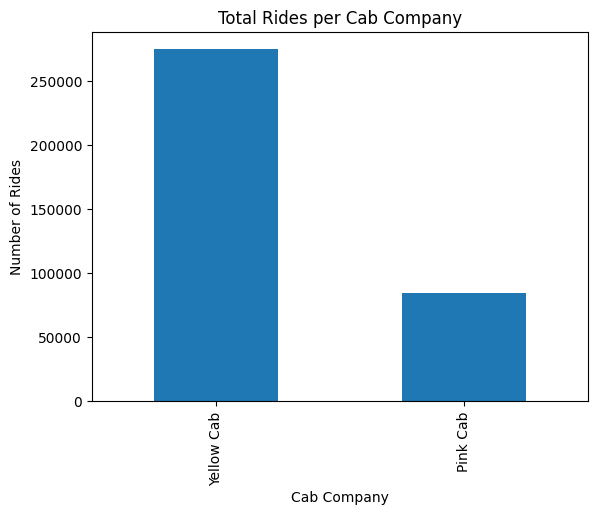

In [15]:
import matplotlib.pyplot as plt

# Plot the number of rides per cab company
cab_company_counts.plot(kind='bar')
plt.title('Total Rides per Cab Company')
plt.xlabel('Cab Company')
plt.ylabel('Number of Rides')
plt.show()


## Step 10: Visualizing the Average Fare per City
A bar plot is used to visualize the average fare charged in each city. This visualization helps to identify which cities have higher or lower average fares, providing insights into regional pricing and demand trends.


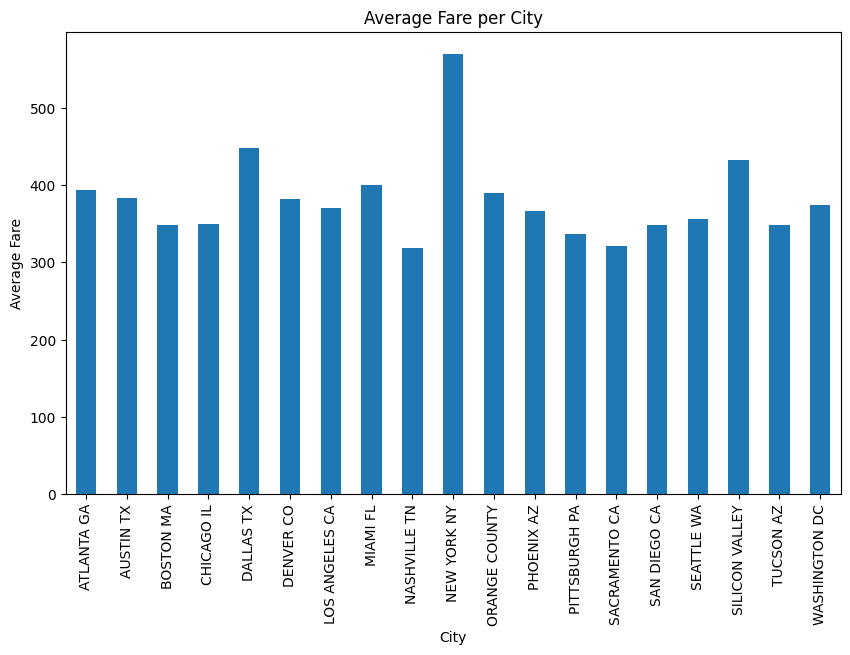

In [16]:
# Plot the average fare per city
avg_fare_per_city.plot(kind='bar', figsize=(10,6))
plt.title('Average Fare per City')
plt.xlabel('City')
plt.ylabel('Average Fare')
plt.show()


## Step 11: Visualizing the Payment Mode Distribution
A bar plot is used to visualize the distribution of payment modes across all rides. This visualization highlights the preferred payment methods among customers, which can inform decisions related to payment infrastructure.


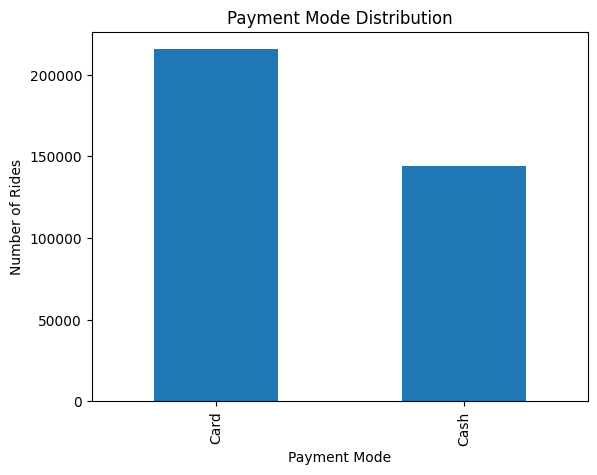

In [17]:
# Plot the payment mode distribution
payment_mode_counts.plot(kind='bar')
plt.title('Payment Mode Distribution')
plt.xlabel('Payment Mode')
plt.ylabel('Number of Rides')
plt.show()
